In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Production and emission data for the oil and gas on the Norwegian Continental Shelf


In [ ]:
# Creating a function to plot the values for each field in a specified column


def plot_field_values(df, column, title, fields=None):
	"""
	Plots the values for each field in a specified column.

	Parameters:
	df (pd.DataFrame): DataFrame containing the data to plot.
	column (str): Name of the column to plot.

	Returns:
	None
	"""
	print(title)
	if fields is not None:
		df = df[df['field'].isin(fields)]

	# field is a column set hue=None
	if 'field' not in df.columns:
		hue = None
	else:
		hue = 'field'

	# Create the plot
	plt.figure(figsize=(12, 8))
	sns.lineplot(data=df, x='year', y=column, hue=hue)
	#sns.lineplot(data=df, x='year', y=column, hue=hue, palette='Blues')
	plt.title(title)
	plt.xlabel("Year")
	# Set the y-axis label to the column name but change the first letter to uppercase and _ to ' '
	y_label = column.replace('_', ' ')
	# Cap first letter of each word
	y_label = y_label.title()
	plt.ylabel(y_label)
	# Each year should be visible on the X-axis
	plt.xticks(df['year'].unique())
	# Make xticks partly angled and smaller
	plt.xticks(rotation=45, fontsize=8)
	plt.legend(title='Field', bbox_to_anchor=(1.05, 1), loc='upper left')
	plt.grid(True)
	plt.tight_layout()
	plt.show()

In [ ]:
# Plotting the CO2 emissions for each field over the years

# Top 20 CO2 polluting fields over the years

top_20_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=False).head(20).index
top_10_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=False).head(10).index
bottom_10_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(10).index
bottom_20_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(20).index
bottom_30_co2_polluting_fields = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].sum().sort_values(ascending=True).head(30).index


In [ ]:
top_20_co2_polluting_fields

Index(['statfjord', 'gullfaks', 'åsgard', 'oseberg', 'ekofisk', 'troll',
       'snorre', 'sleipner øst', 'heidrun', 'norne', 'eldfisk', 'visund',
       'sleipner vest', 'draugen', 'brage', 'oseberg sør', 'kristin', 'ula',
       'valhall', 'grane'],
      dtype='object', name='field')

In [ ]:
emissions_df

1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
0,grane,2022,36.071693,993246298,404.470720,1.896859e+06,16.327993,180.655154,equinor energy as
1,grane,2023,66.983955,993246298,306.382910,2.161263e+06,24.543974,188.267980,equinor energy as
2,norne,1997,383.058529,893246592,2944.992072,3.430000e+02,1.967516,761.336994,equinor energy as
3,norne,1998,826.358898,893246592,1792.114235,6.820800e+04,3.134315,418.303952,equinor energy as
4,norne,1999,1042.015537,893246592,1412.344364,2.801130e+05,11.709334,347.059880,equinor energy as
...,...,...,...,...,...,...,...,...,...
1312,aasta hansteen,2018,67.148045,912731456,988.441010,8.498236e+03,0.183095,72.503572,equinor energy as
1313,aasta hansteen,2019,93.355221,912731456,202.908995,1.959150e+04,0.771865,177.647453,equinor energy as
1314,aasta hansteen,2020,94.063341,912731456,147.469687,3.099277e+04,1.465783,192.207951,equinor energy as
1315,aasta hansteen,2021,103.162276,912731456,138.530349,2.496023e+04,0.397254,191.436769,equinor energy as


Top 20 CO2 Emitting Fields (Yearly)


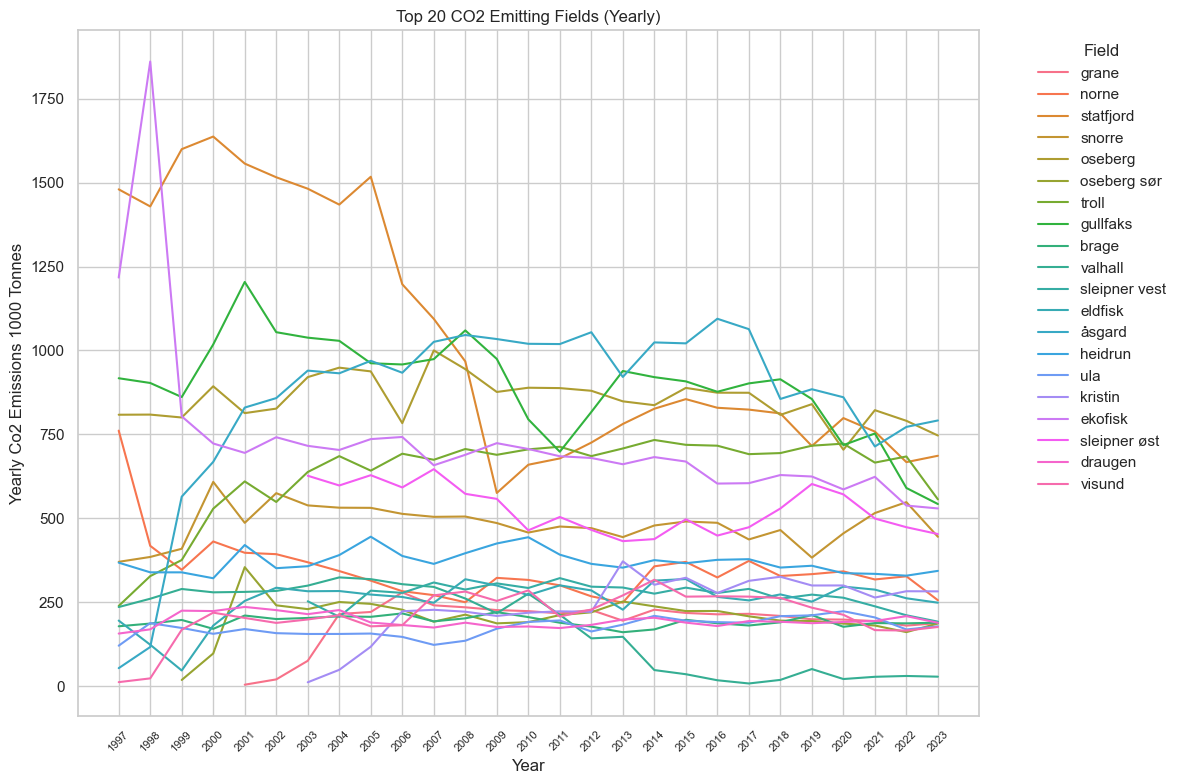

In [ ]:
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', 'Top 20 CO2 Emitting Fields (Yearly)', top_20_co2_polluting_fields)



Top 10 CO2 Emitting Fields (Yearly)


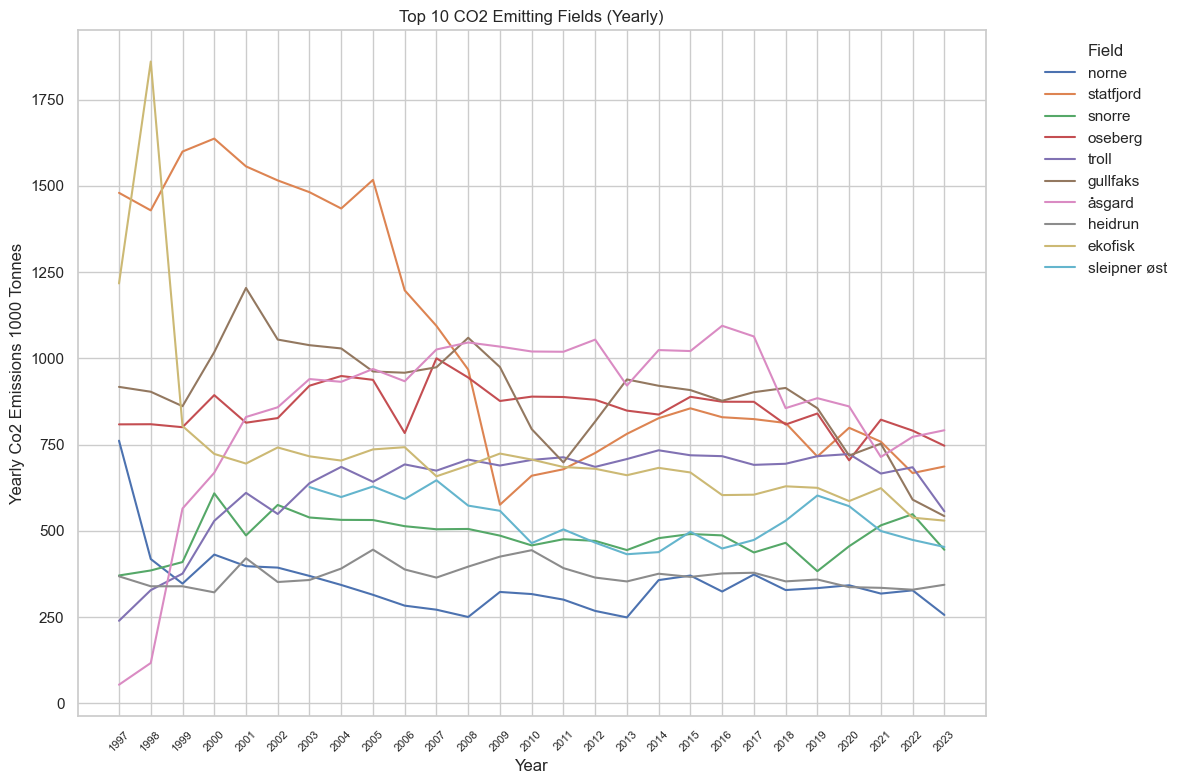

In [ ]:
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', 'Top 10 CO2 Emitting Fields (Yearly)', top_10_co2_polluting_fields)


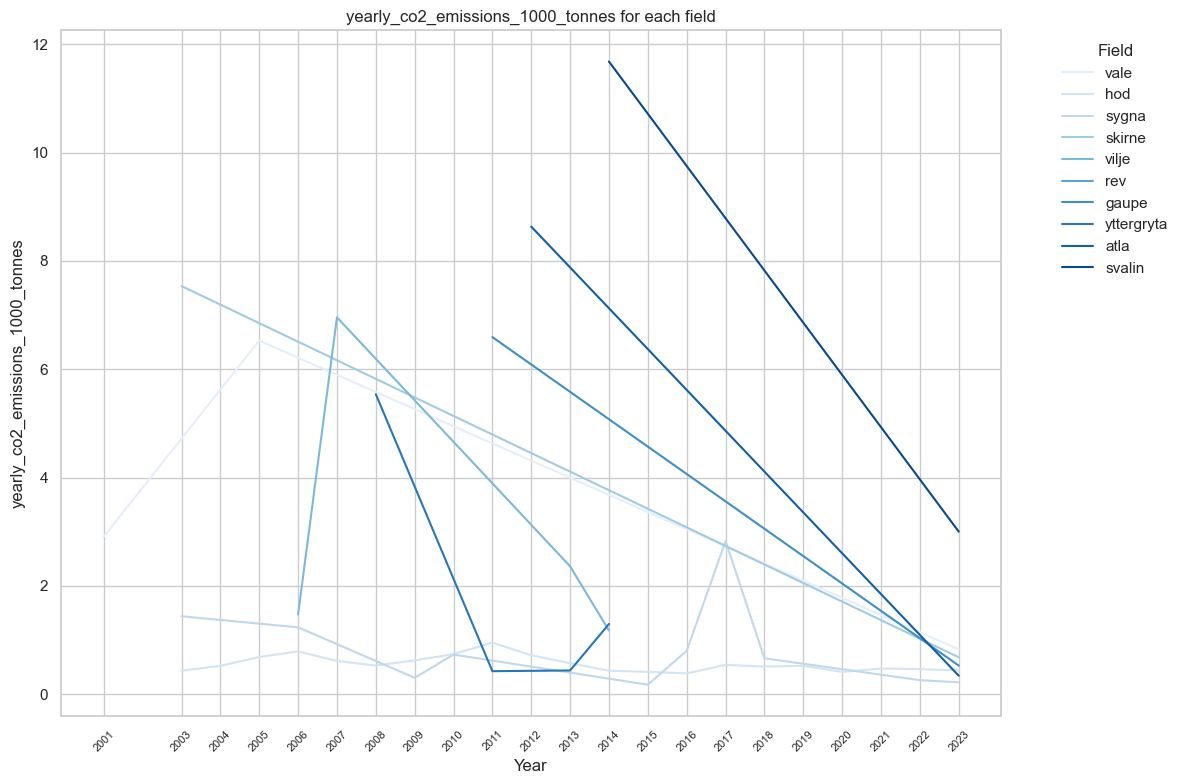

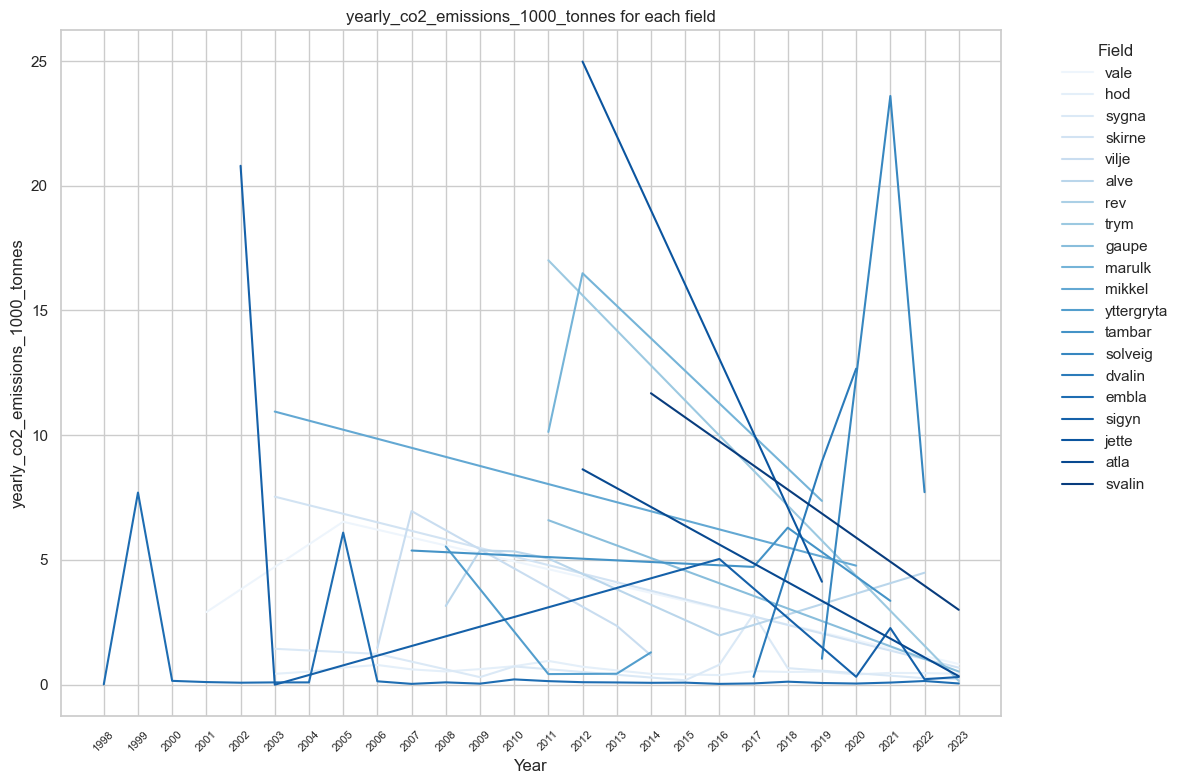

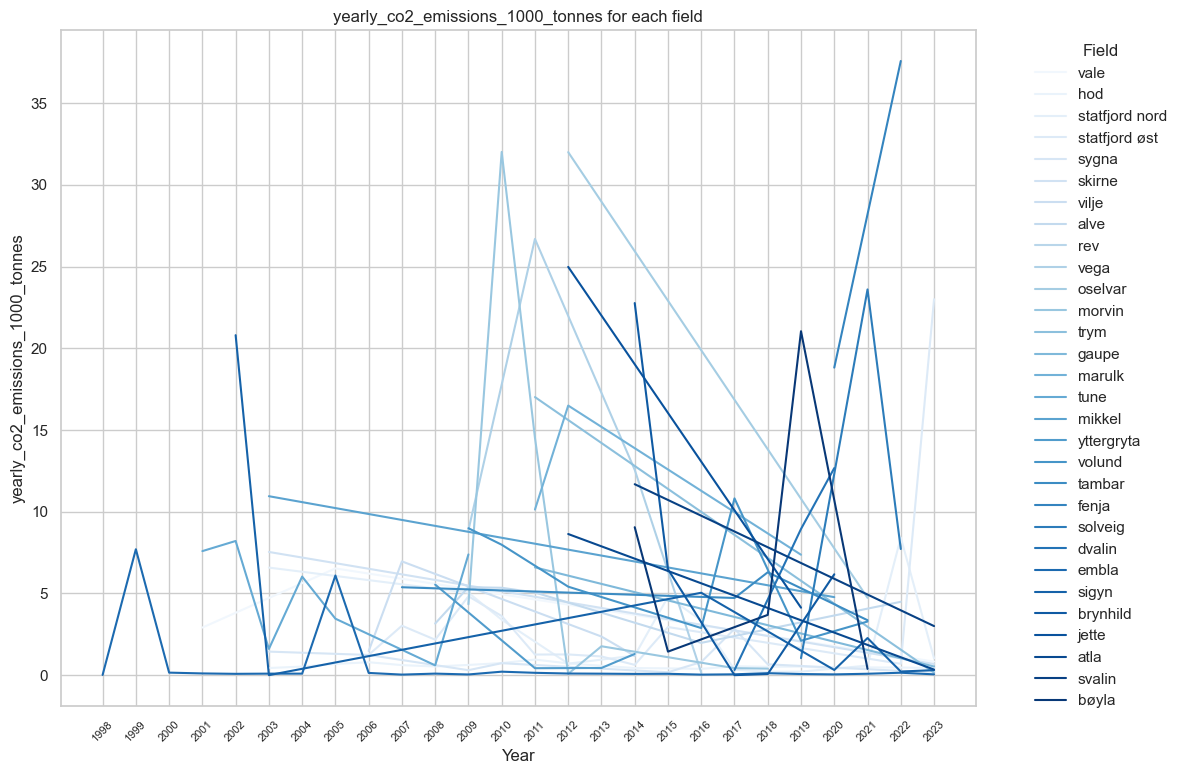

In [ ]:
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', bottom_10_co2_polluting_fields)


plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', bottom_20_co2_polluting_fields)
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', bottom_30_co2_polluting_fields)


In [ ]:
# Checking the number of yearly_emission_co2_1000_tons observations for each field

co2_obs_per_field = emissions_df.groupby('field')['yearly_co2_emissions_1000_tonnes'].count().sort_values(ascending=False)

# Displaying all the fields with less than 8 observations

num_of_obs = 8

co2_obs_per_field[co2_obs_per_field < num_of_obs]
print(co2_obs_per_field[co2_obs_per_field < num_of_obs])

field
tune              7
volund            7
aasta hansteen    7
maria             7
sigyn             7
morvin            7
alve              6
bøyla             5
brynhild          5
yttergryta        4
vilje             4
tambar            4
vega              4
dvalin            3
solveig           3
marulk            3
vale              3
johan castberg    3
jette             2
mikkel            2
svalin            2
atla              2
gaupe             2
oselvar           2
trym              2
skirne            2
fenja             2
rev               1
Name: yearly_co2_emissions_1000_tonnes, dtype: int64


54
Yearly CO2 Emissions for Fields with More than 10 Observations


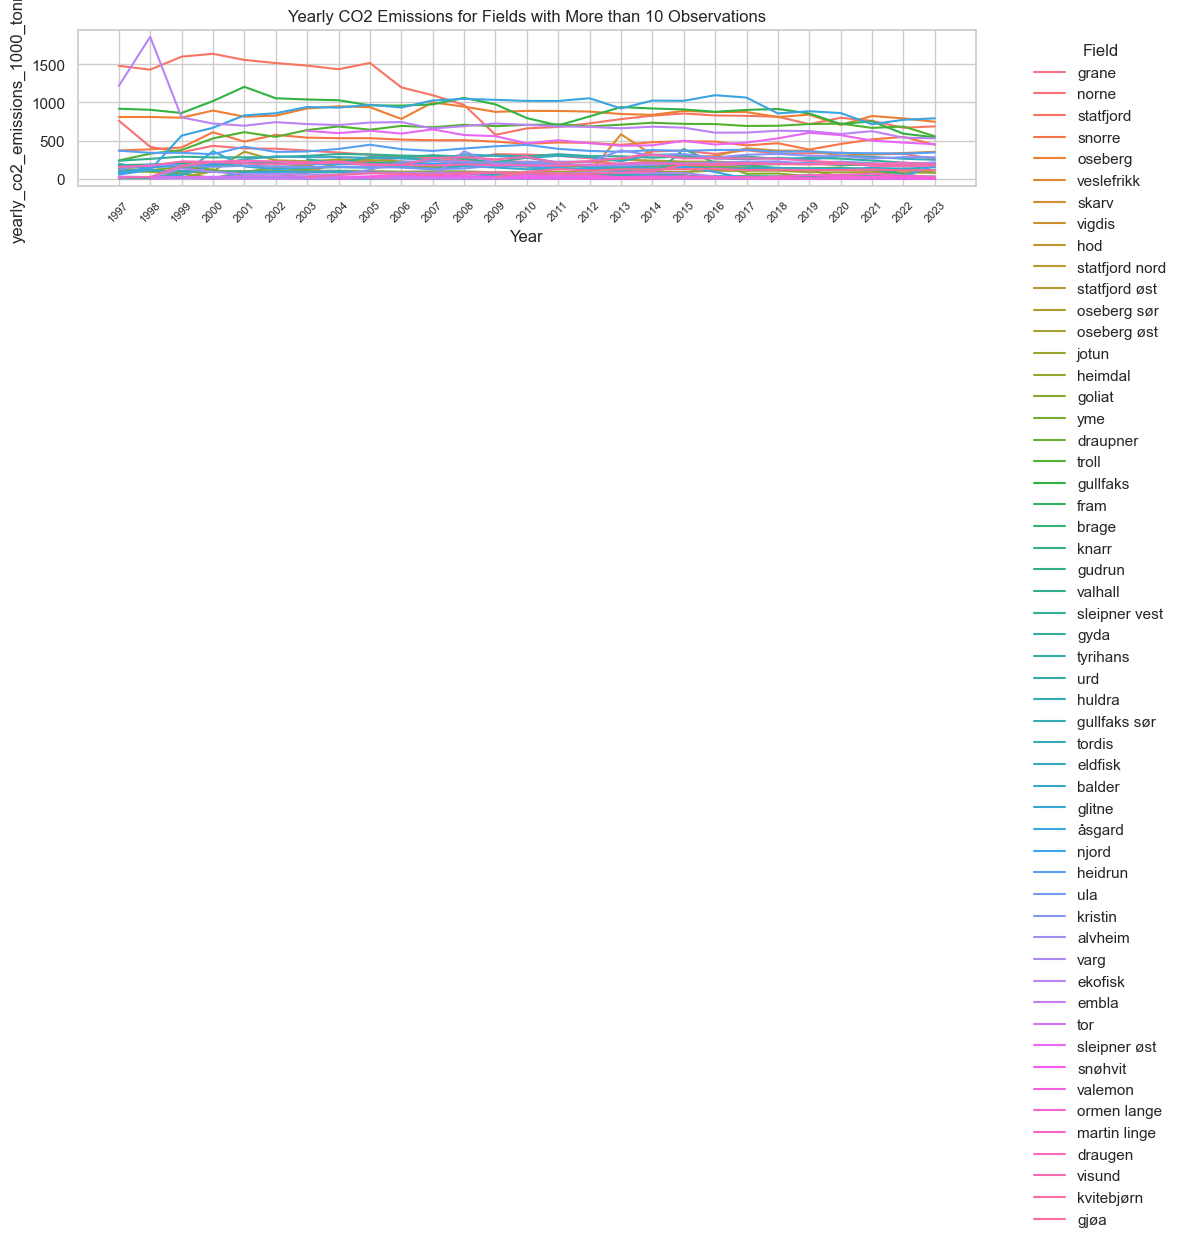

In [ ]:
# Plotting the yearly CO2 emissions for all the fields that has more than 10 observations

fields_with_more_than_10_obs = co2_obs_per_field[co2_obs_per_field > 10].index
print(len(fields_with_more_than_10_obs))
plot_field_values(emissions_df, 'yearly_co2_emissions_1000_tonnes', 'Yearly CO2 Emissions for Fields with More than 10 Observations', fields_with_more_than_10_obs)



In [ ]:
# printing all data about the svalin field, but column is object

emissions_df['field'] = emissions_df['field'].apply(lambda x: str(x).strip().lower() if pd.notnull(x) else x)
emissions_df[emissions_df['field'] == 'svalin']

1,field,year,yearly_ch4_emissions_tons,org_number,yearly_nox_emissions_tons,yearly_water_emissions_m3,yearly_subsea_water_emissions,yearly_oil_spill_emissions_tons,yearly_co2_emissions_1000_tonnes,operator
1103,svalin,2014,0.5,993246298,201.510188,NaN,NaN,NaN,11.681839,equinor energy as
1104,svalin,2023,0.0,993246298,40.527000,874.7,NaN,0.007922,3.002385,equinor energy as


In [ ]:
# Printing the co2 emissions for the field svalin

display(emissions_co2_df)

# Checking datatypes
emissions_co2_df.dtypes


1,field,year,yearly_co2_emissions_1000_tonnes,org_number,operator
2,grane,2022,180.655154,993246298,equinor energy as
3,grane,2023,188.267980,993246298,equinor energy as
4,norne,1997,761.336994,893246592,equinor energy as
5,norne,1998,418.303952,893246592,equinor energy as
6,norne,1999,347.059880,893246592,equinor energy as
...,...,...,...,...,...
1314,aasta hansteen,2018,72.503572,912731456,equinor energy as
1315,aasta hansteen,2019,177.647453,912731456,equinor energy as
1316,aasta hansteen,2020,192.207951,912731456,equinor energy as
1317,aasta hansteen,2021,191.436769,912731456,equinor energy as


1
field                                object
year                                  int64
yearly_co2_emissions_1000_tonnes    float64
org_number                            int64
operator                             object
dtype: object

In [ ]:
total_yearly_co2_emissions = emissions_df.groupby('year')['yearly_co2_emissions_1000_tonnes'].sum()
total_yearly_co2_emissions

# Setting the yearly_co2_emissions_1000_tonnes as a column name for the total_yearly_co2_emissions df

total_yearly_co2_emissions = total_yearly_co2_emissions.reset_index()
total_yearly_co2_emissions



,year,yearly_co2_emissions_1000_tonnes
0,1997,7731.721217
1,1998,8268.503038
2,1999,8374.042935
3,2000,9573.888420
4,2001,10004.184362
5,2002,9819.142275
6,2003,10842.896541
7,2004,11235.153537
8,2005,11349.129521
9,2006,10914.894036


/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_65404/1584691247.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='year', y=column, hue=hue, palette='Blues')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


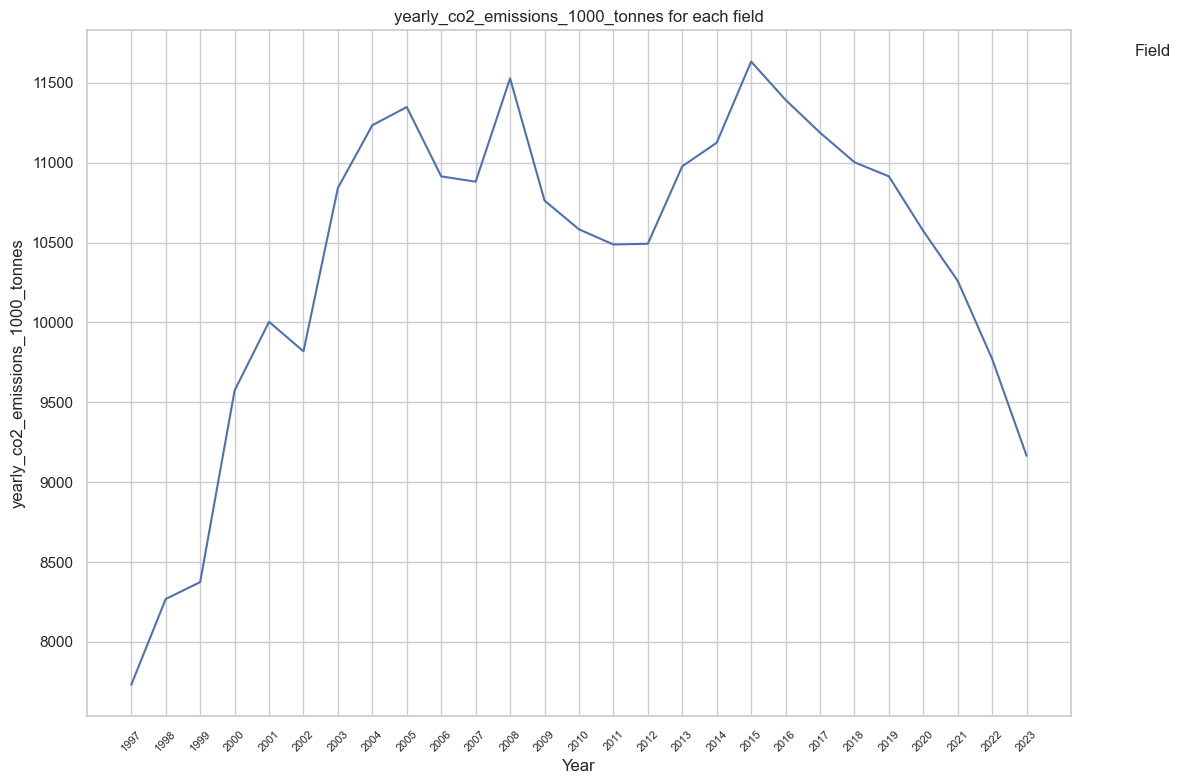

In [ ]:

# Plot the total yearly CO2 emissions using the function

plot_field_values(total_yearly_co2_emissions, 'yearly_co2_emissions_1000_tonnes')



In [ ]:
# Finding the drivers for the rapid decline in CO2 emissions from 2000 and onwards




/var/folders/bq/x4f4q_6s4sz988ksbbmgknk00000gn/T/ipykernel_65404/2722517796.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


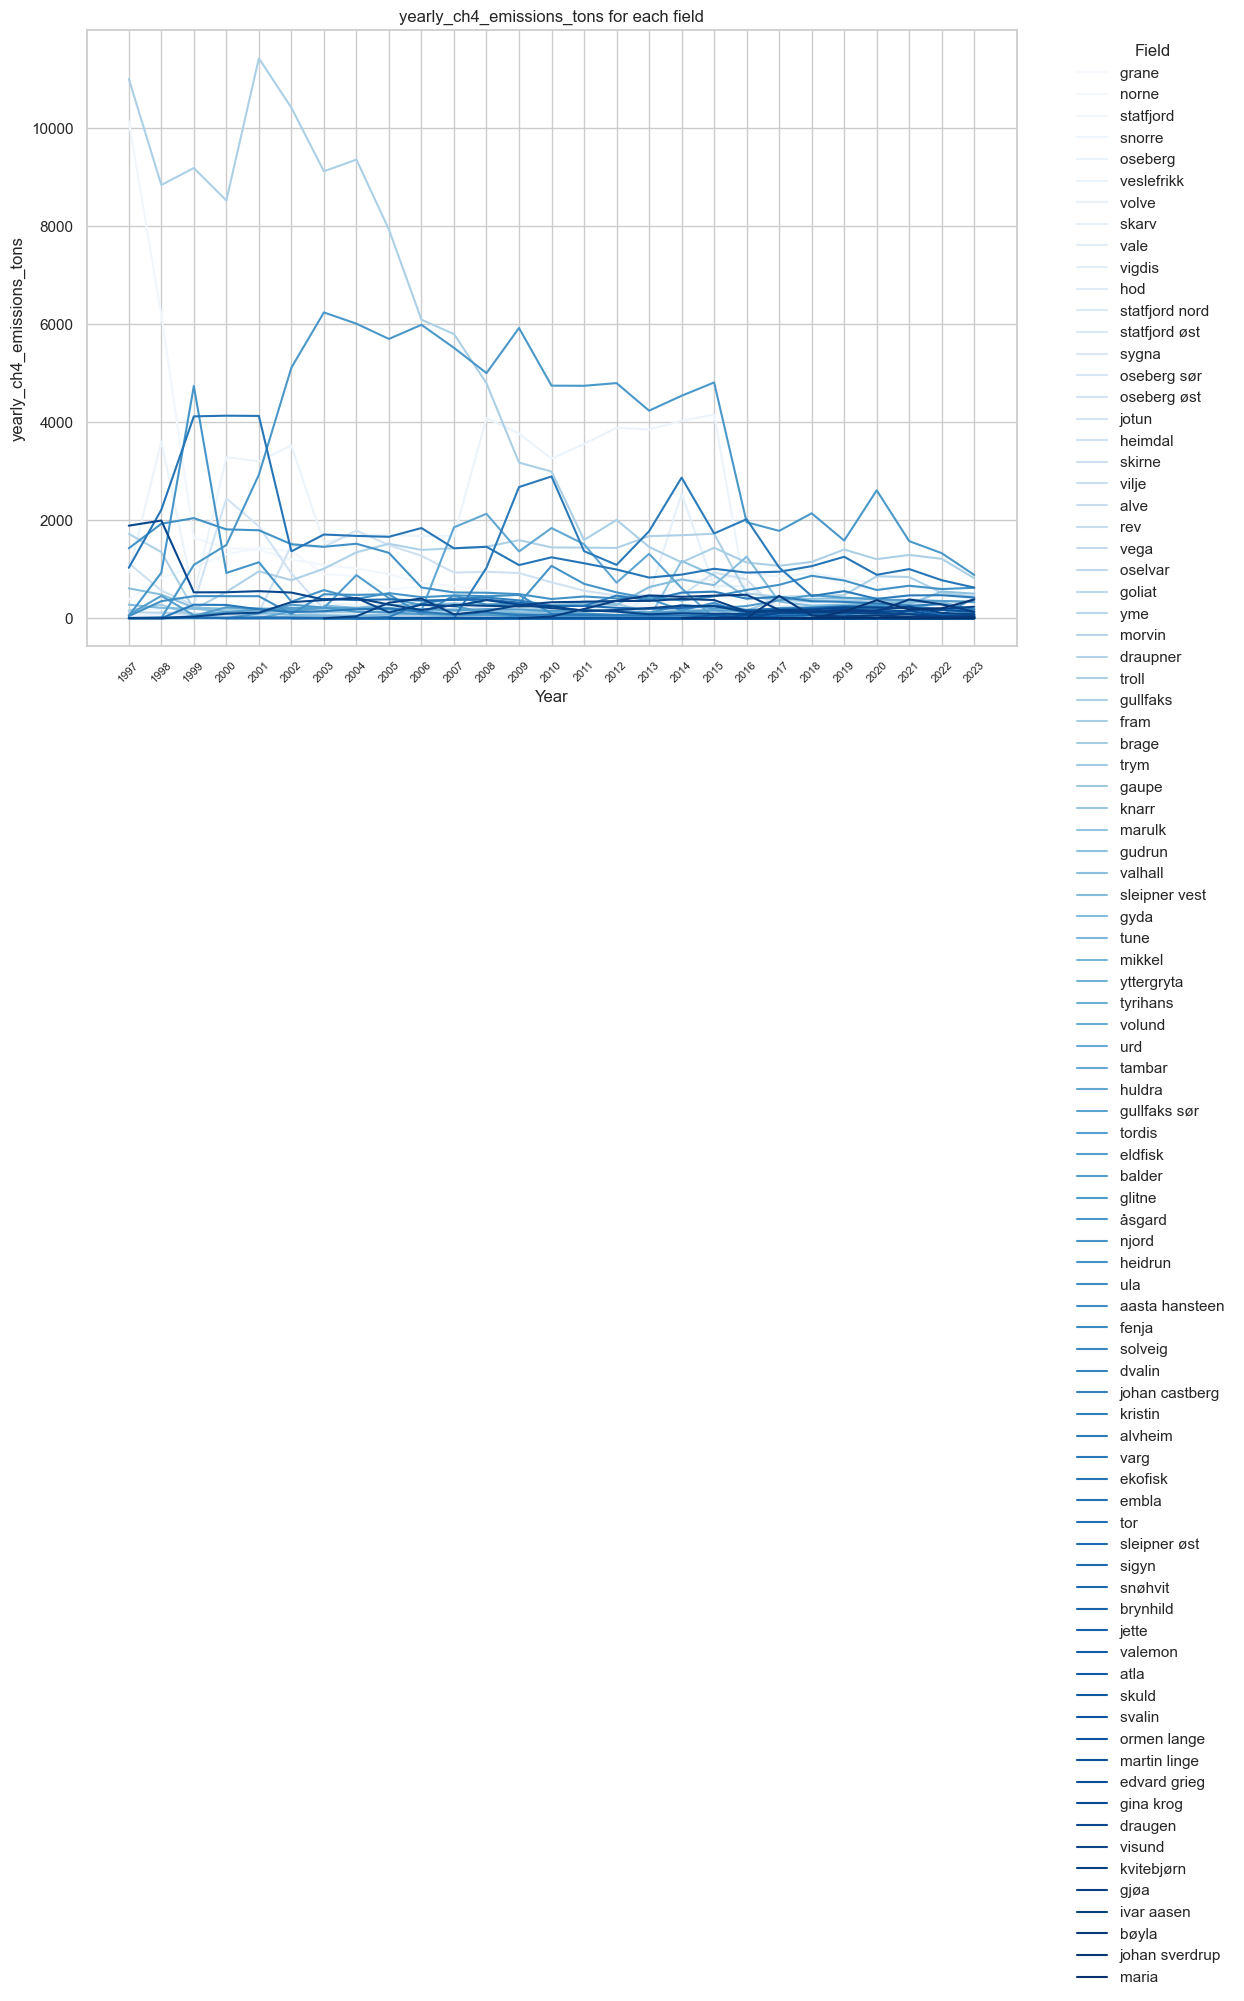

In [ ]:
plot_field_values(emissions_df, 'yearly_ch4_emissions_tons')


In [ ]:
# Printing the data for tyrving field